In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/incubation_data_HW3.csv"

In [4]:
incubation_df = pd.read_csv(csv_file)

In [5]:
incubation_df

,Cycle,State,DOC_mgL-1,Error,Sulfate_mM,Error.1,Fe_uM,Error.2,Mn_uM,Error.3
0,1,Anoxic,27.906667,1.451926,0.000000,0.000000,6347.39035,174.05727,29.36418,0.06335
1,1,Oxic,1.753467,0.517602,0.041005,0.011568,1.89314,1.72413,4.62133,2.82457
2,2,Anoxic,20.018667,2.835970,0.000000,0.000000,3223.27706,358.55438,21.72418,1.86388
3,2,Oxic,3.297333,0.292271,0.105827,0.013117,5.14494,2.49502,5.99089,0.09757
4,3,Anoxic,20.438667,2.313653,0.000000,0.000000,2143.29331,11.65566,22.54822,2.04718
5,3,Oxic,4.282667,0.218732,0.159357,0.021363,1.82269,0.63681,13.36719,2.54714
6,0,Anoxic,50.040000,3.111270,0.000000,0.000000,8396.16626,466.22335,39.04909,1.49401
7,0,Oxic,4.556000,0.733505,0.338229,0.064050,14.06580,4.54148,3.70001,2.54148


In [6]:
state = incubation_df.groupby("State")
cycle = incubation_df.groupby("Cycle")
for name, group in state:
    display(f"Group: {name}")
    display(group)

'Group: Anoxic'

,Cycle,State,DOC_mgL-1,Error,Sulfate_mM,Error.1,Fe_uM,Error.2,Mn_uM,Error.3
0,1,Anoxic,27.906667,1.451926,0.0,0.0,6347.39035,174.05727,29.36418,0.06335
2,2,Anoxic,20.018667,2.835970,0.0,0.0,3223.27706,358.55438,21.72418,1.86388
4,3,Anoxic,20.438667,2.313653,0.0,0.0,2143.29331,11.65566,22.54822,2.04718
6,0,Anoxic,50.040000,3.111270,0.0,0.0,8396.16626,466.22335,39.04909,1.49401


'Group: Oxic'

,Cycle,State,DOC_mgL-1,Error,Sulfate_mM,Error.1,Fe_uM,Error.2,Mn_uM,Error.3
1,1,Oxic,1.753467,0.517602,0.041005,0.011568,1.89314,1.72413,4.62133,2.82457
3,2,Oxic,3.297333,0.292271,0.105827,0.013117,5.14494,2.49502,5.99089,0.09757
5,3,Oxic,4.282667,0.218732,0.159357,0.021363,1.82269,0.63681,13.36719,2.54714
7,0,Oxic,4.556000,0.733505,0.338229,0.064050,14.06580,4.54148,3.70001,2.54148


In [12]:
Mn_oxic = state.get_group('Oxic').iloc[0]
Mn_anoxic = state.get_group('Anoxic').iloc[0]

In [39]:
# Plotting variables
solute_error_pairs = {
    "DOC_mgL-1": "Error",
    "Sulfate_mM": "Error.1",
    "Fe_uM": "Error.2",
    "Mn_uM": "Error.3"
}
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}

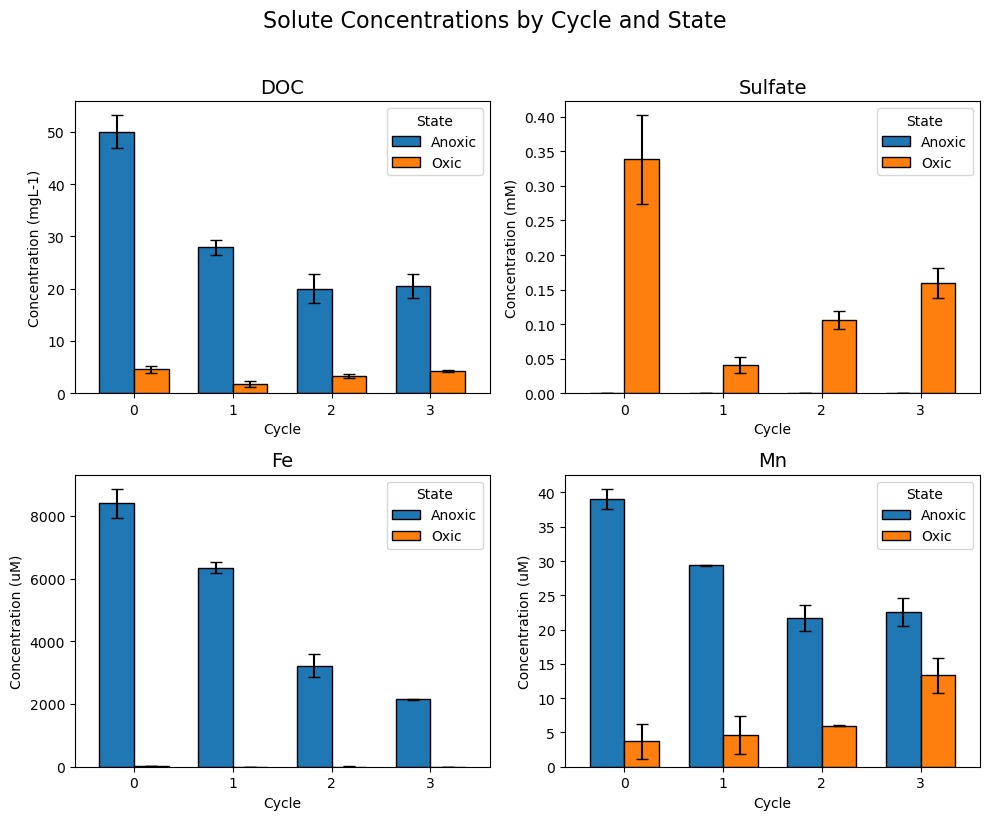

In [41]:
solutes = list(solute_error_pairs.keys())

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
axes = axes.flatten()

for i, solute in enumerate(solutes):
    err_col = solute_error_pairs[solute]

    # Pivot solute values and errors
    pivot = incubation_df.pivot(index="Cycle", columns="State", values=solute)
    err_pivot = incubation_df.pivot(index="Cycle", columns="State", values=err_col)

    # Plot with error bars
    pivot.plot(
        kind="bar",
        yerr=err_pivot,
        ax=axes[i],
        width=0.7,
        edgecolor="black",
        capsize=4,
        legend=True
    )

    # Formatting
    axes[i].set_title(solute.split('_')[0], fontsize=font_labels['size'])
    axes[i].set_xlabel("Cycle")
    axes[i].set_ylabel(f"Concentration ({solute.split('_')[1]})")
    axes[i].tick_params(axis="x", rotation=0)

    axes[i].legend(title="State")

# Overall layout
plt.suptitle("Solute Concentrations by Cycle and State", fontsize=font_titles['size'], y=1.02)

plt.tight_layout()
plt.show()

In [ ]:
molecular_mass_Mn = 54.938 # grams of Mn per mole
vol = 0.01 # liters of water
mass_conversion = 0.001 # grams to micrograms
mass_sed = 30 # grams
Mn_consumed = Mn_anoxic['Mn_uM'] - Mn_oxic['Mn_uM']
cycle1_hrs = 8 * 24
Mn_rate = Mn_consumed / cycle1_hrs # uM per hour

np.float64(0.12886901041666668)

In [26]:
Mn_oxidation = (Mn_rate * vol * molecular_mass_Mn * mass_conversion) / mass_sed # microgram Mn per g_sediment per hour

In [ ]:
from IPython.display import display, Markdown

display(Markdown(
    fr"""
Rate of Manganese oxidation: {Mn_oxidation:e} $\,ugMn\,g_{{sed}}^{{-1}}\,yr^{{-1}}$
"""
))


Rate of Manganese oxidation: 2.359935e-06 $\,ugMn\,g_{sed}^{-1}\,yr^{-1}$

